#Bài tập thực hành - Lập trình máy học cho python - CS116.M11



MSSV: 19521299

Tên: Nguyễn Chí Cường

Ngày: 26/10/2021

Linear Regression Đơn - Đa biến (Salary Data - 50 Startup)

Tuần 8

#Bài 1: Linear Đơn biến

In [ ]:
#import thư viên
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Read data
df_salary = pd.read_csv('Salary_Data.csv')
df_salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
data_simple = np.array(df_salary['YearsExperience']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(data_simple,
                                                    df_salary['Salary'],test_size=0.2, random_state=42)

In [ ]:
def data_show(train, test):
  plt.plot(train[0], train[1], 'x', color='red')
  plt.plot(test[0], test[1], 'o', color='blue')
  plt.title('Data Salary ')
  plt.xlabel('Years Experience')
  plt.ylabel('Salary')
  plt.show()

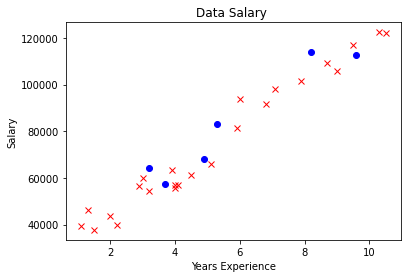

In [ ]:
data_show([X_train, y_train], [X_test, y_test])

In [ ]:
def show_MSE(estimated, test):
    value1 = mse(estimated, test)
    value2 = mae(estimated, test)
    print('Mean squared error:', value1)
    print('Mean absolute error:', value2)

def draw_plot(X, y, estmated, name):
  r_sq = r2_score(estmated, y)
  print(name + ':')
  print('R squre:', r_sq)
  show_MSE(estmated, y)
  plt.plot(X, y, "x", color='red')
  plt.plot(X, estmated)
  plt.title(name)
  plt.xlabel('Years Experience')
  plt.ylabel('Salary')
  plt.show()

def draw_full(prediction):
  plt.plot(X_train, y_train, "x", color='red')
  plt.plot(X_test, y_test, 'o', color='blue')
  plt.plot(X_train, prediction)
  plt.title("-----------------------Full data-----------------------")
  plt.xlabel('Years Experience')
  plt.ylabel('Salary')
  plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()
def polynomial(X, y, number):
  polynomial_features= PolynomialFeatures(degree=number)
  x_poly = polynomial_features.fit_transform(X)
  #Train data
  pol_LR = model.fit(x_poly, y)
  prediction_train = pol_LR.predict(x_poly)
  draw_plot(X, y, prediction_train, 'data train')

  #Test_data
  X_test_poly = polynomial_features.fit_transform(X_test)
  prediction_test = pol_LR.predict(X_test_poly)
  draw_plot(X_test, y_test, prediction_test, 'data test')

  print("Full data-------------------------------------")
  estimated_full = np.concatenate((prediction_train, prediction_test))
  draw_full(prediction_train)

data train:
R squre: 0.963236530497694
Mean squared error: 27102249.731261358
Mean absolute error: 4221.046734449731


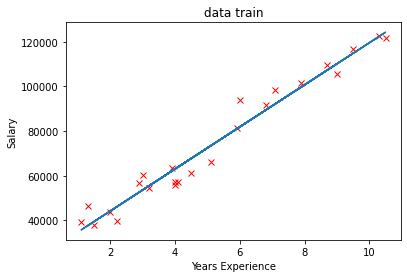

data test:
R squre: 0.8961838737587332
Mean squared error: 49830096.85590827
Mean absolute error: 6286.453830757745


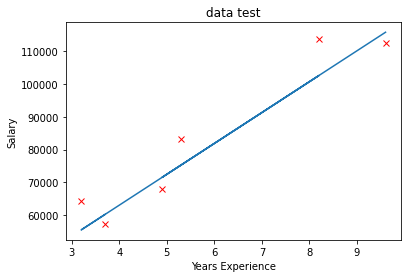

Full data-------------------------------------


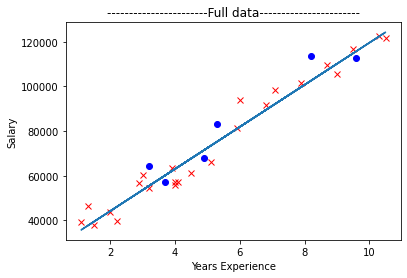

In [ ]:
#loại hồi quy y = theta1X + theta0
polynomial(X_train, y_train, 1)

data train:
R squre: 0.963737036587951
Mean squared error: 26746185.58722925
Mean absolute error: 4304.350295127767


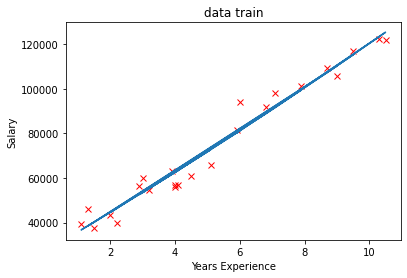

data test:
R squre: 0.8930921952051858
Mean squared error: 52527916.36877499
Mean absolute error: 6381.371429702192


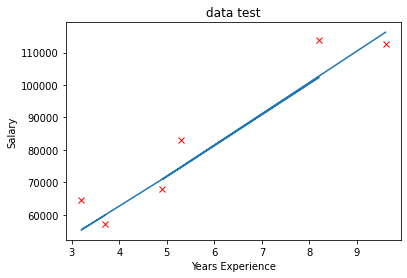

Full data-------------------------------------


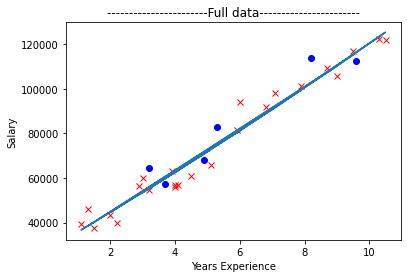

In [ ]:
#loại hồi quy y = theta2X^2 + theta1X + theta0
polynomial(X_train, y_train, 2)

#Bài 2: Linear Đa Biến

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [146]:
df_startup = pd.read_csv('50_Startups.csv')
df_startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [150]:
df_feat = df_startup.drop('Profit', axis=1)
value = df_startup['Profit']
feature=pd.get_dummies(df_feat,drop_first=False)

In [151]:
feature_train, feature_test, value_train, value_test = train_test_split(feature, value,
                                                                        test_size=0.2, random_state=42)

In [152]:
#Train model và predict giá trị
LR = LinearRegression()
LR.fit(feature_train, value_train)
predict = LR.predict(feature_test)

In [153]:
#Tính MSE, R Score, MAE
print("R Score:", r2_score(value_test, predict))
print("Mean Square Error:", mse(value_test, predict))
print("Mean Absolute Error:", mae(value_test, predict))

R Score: 0.8987266414329448
Mean Square Error: 82010363.04423533
Mean Absolute Error: 6961.477813250242


#Bài 3: Thử với Classification

In [ ]:
def Kflod_score(model, n):
  cv = ShuffleSplit(n_splits=n, test_size=0.2, random_state=0)
  score = cross_val_score(model, data_, class_, cv=cv)
  return score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

KNN = KNeighborsClassifier(n_neighbors=3)
SVM = svm.SVC()
DTree = tree.DecisionTreeClassifier()
MNB = MultinomialNB()
BNB = BernoulliNB()
RF = RandomForestClassifier(max_depth=2, random_state=0)
lr_clf = LogisticRegression(random_state=0)
#Kenerl SVM

kernel_svm = []
for kernel in ['poly', 'rbf', 'sigmoid']:
  clf_svm = svm.SVC(kernel=kernel, coef0=0)
  kernel_svm.append(clf_svm)

##Data Salary

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
salary_feature = scaler.fit_transform(df_salary[['YearsExperience']])
salary_class = le.fit_transform(df_salary[['Salary']])

In [ ]:
def Kflod_score_Salary(model, n):
  cv = ShuffleSplit(n_splits=n, test_size=0.2, random_state=0)
  score = cross_val_score(model, salary_feature, salary_class, cv=cv)
  return score

In [ ]:
models = zip(("KNN Classifier", "SVM", "Decision Tree", "Multinomia Naive Bayes", "Bernoulli Naive Bayes", "Random Forest", "Logistic Regression", "Polynomial SVM", "RBF SVM", "Sigmoid SVM"),
             [KNN, SVM, DTree, MNB, BNB, RF, lr_clf] + kernel_svm)

for txt, model in models:
  score = Kflod_score_Salary(model, 5)
  print(txt + " ------------------------------------------------------------------------------------")
  print("Accuracy: ", score.mean())
  print("Độ lệch chuẩn: ", score.std())
  print('\n')

KNN Classifier ------------------------------------------------------------------------------------
Accuracy:  0.0
Độ lệch chuẩn:  0.0


SVM ------------------------------------------------------------------------------------
Accuracy:  0.0
Độ lệch chuẩn:  0.0


Decision Tree ------------------------------------------------------------------------------------
Accuracy:  0.0
Độ lệch chuẩn:  0.0


Multinomia Naive Bayes ------------------------------------------------------------------------------------
Accuracy:  0.0
Độ lệch chuẩn:  0.0


Bernoulli Naive Bayes ------------------------------------------------------------------------------------
Accuracy:  0.0
Độ lệch chuẩn:  0.0


Random Forest ------------------------------------------------------------------------------------
Accuracy:  0.0
Độ lệch chuẩn:  0.0


Logistic Regression ------------------------------------------------------------------------------------
Accuracy:  0.0
Độ lệch chuẩn:  0.0


Polynomial SVM -------------------

##Data Startup

In [ ]:
#scaler feature
le_startup = LabelEncoder()
startup_feature = scaler.fit_transform(feature)
le_startup.fit(df_startup[['Profit']])
startup_class = le_startup.transform(df_startup[['Profit']])

In [ ]:
def Kflod_score_Startup(model, n):
  cv = ShuffleSplit(n_splits=n, test_size=0.2, random_state=0)
  score = cross_val_score(model, startup_feature, startup_class, cv=cv)
  return score

In [ ]:
models = zip(("KNN Classifier", "SVM", "Decision Tree", "Multinomia Naive Bayes", "Bernoulli Naive Bayes", "Random Forest", "Logistic Regression", "Polynomial SVM", "RBF SVM", "Sigmoid SVM"),
             [KNN, SVM, DTree, MNB, BNB, RF, lr_clf] + kernel_svm)
for txt, model in models:
  score = Kflod_score_Startup(model, 5)
  print(txt + " ------------------------------------------------------------------------------------")
  print("Accuracy: ", score.mean())
  print("Độ lệch chuẩn: ", score.std())
  print('\n')

KNN Classifier ------------------------------------------------------------------------------------
Accuracy:  0.0
Độ lệch chuẩn:  0.0


SVM ------------------------------------------------------------------------------------
Accuracy:  0.0
Độ lệch chuẩn:  0.0


Decision Tree ------------------------------------------------------------------------------------
Accuracy:  0.0
Độ lệch chuẩn:  0.0


Multinomia Naive Bayes ------------------------------------------------------------------------------------
Accuracy:  0.0
Độ lệch chuẩn:  0.0


Bernoulli Naive Bayes ------------------------------------------------------------------------------------
Accuracy:  0.0
Độ lệch chuẩn:  0.0


Random Forest ------------------------------------------------------------------------------------
Accuracy:  0.0
Độ lệch chuẩn:  0.0


Logistic Regression ------------------------------------------------------------------------------------
Accuracy:  0.0
Độ lệch chuẩn:  0.0


Polynomial SVM -------------------

###Nhận xét 1:

>Có vẻ khi dùng classification cho bài toán phân lớp thì số lớp quá nhiều so với số data, nên model sẽ không train được tốt dẫn đến Accuracy của toàn bộ model đề có kết quả bằng 0.

>Có thể thấy việc áp dụng các model classification và các bài toán hồi quy là không khả thi.

>Cần phải xác định và phân loại rõ bài toán Regression và Classification.

>Kết luận: Giải bài toán Regression theo hướng Classification là không hiểu quả.

>Chính xác hơn đây chính là bài toán Regression

In [ ]:
data_train, data_test, class_train, class_test = train_test_split(startup_feature, startup_class,
                                                                  test_size=0.2, random_state=42)

In [ ]:
def predict_model(model):
  
  model.fit(data_train, class_train)
  predict_class = model.predict(data_test)
  predict_class = le_startup.inverse_transform(predict_class)

  return predict_class

In [ ]:
lst_model = [KNN, SVM, DTree, MNB, BNB, RF, lr_clf] + kernel_svm
prediction = []
for model in lst_model:
  predict = predict_model(model)
  prediction.append(predict)

In [ ]:
table_res = pd.DataFrame(prediction, columns=["KNN Classifier", "SVM", "Decision Tree", "Multinomia Naive Bayes",
                                         "Bernoulli Naive Bayes", "Random Forest", "Logistic Regression",
                                         "Polynomial SVM", "RBF SVM", "Sigmoid SVM"])

In [ ]:
table_res['Real'] = le_startup.inverse_transform(class_test)
table_res

,KNN Classifier,SVM,Decision Tree,Multinomia Naive Bayes,Bernoulli Naive Bayes,Random Forest,Logistic Regression,Polynomial SVM,RBF SVM,Sigmoid SVM,Real
0,118474.03,71498.49,77798.83,69758.98,111313.02,69758.98,90708.19,78239.91,14681.40,69758.98,134307.35
1,126992.93,71498.49,96778.92,69758.98,111313.02,81229.06,141585.52,96712.80,65200.33,97483.56,81005.76
2,191792.06,144259.40,97483.56,49490.75,111313.02,49490.75,103282.38,156122.51,126992.93,97483.56,99937.59
3,191792.06,191792.06,97483.56,69758.98,69758.98,81229.06,103282.38,156122.51,156122.51,69758.98,64926.08
4,65200.33,65200.33,49490.75,49490.75,49490.75,49490.75,49490.75,65200.33,65200.33,49490.75,125370.37
5,126992.93,77798.83,97483.56,42559.73,126992.93,42559.73,156122.51,126992.93,156122.51,42559.73,35673.41
6,191792.06,89949.14,42559.73,69758.98,192261.83,81229.06,103282.38,65200.33,42559.73,97483.56,105733.54
7,126992.93,71498.49,96778.92,69758.98,111313.02,81229.06,141585.52,78239.91,78239.91,97483.56,107404.34
8,126992.93,71498.49,96778.92,69758.98,111313.02,81229.06,141585.52,96712.80,65200.33,97483.56,97427.84
9,71498.49,191792.06,192261.83,77798.83,71498.49,81229.06,71498.49,71498.49,191792.06,77798.83,122776.86


###Nhận xét 2:

>Có thế thấy nêu dùng mô hình phân lớp thì kết quả dự đoán lệch rất nhiều so với giá trị thực - Có thể nó là 1 đống hỗn lộn

>Cũng có thể dễ dàng hiểu tại sao khi dùng KFlod đánh giá ta có thể thấy Accuracy toàn bộ cho model đều = 0. Là do việc model không thể phân lớp cho các giá trị này

>Nguyên nhân: Vấn đề là trong tập test không có các lớp trong tập train (Vì đây là bài toán Regression). Khi predict thì các model sẽ predict các giá trị vào trong các phân lớp có trong tập train

=> Dùng model classification là không phù hợp

